# a) On the web site you will find a file called blur.txt that contains a grid of values representing brightness on a black-and-white photo—a badly out-of-focus one that has been deliberately blurred using a Gaussian point spread function of width σ = 25. Write a program that reads the grid of values into a two-dimensional array of real numbers and then draws the values on the screen of the computer as a density plot. You should see the photo appear. If you get something wrong it might be upside-down. Work with the details of your program until you get it appearing correctly. (Hint: The picture has the sky, which is bright, at the top and the ground, which is dark, at the bottom.)


In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
blur = np.loadtxt('../dat/blur.txt')

In [3]:
blur.shape

(1024, 1024)

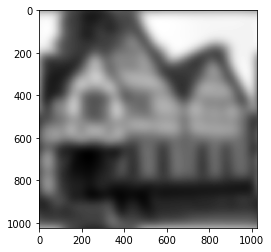

In [4]:
plt.imshow(blur,cmap='gray')

# b) Write another program that creates an array, of the same size as the photo, containing a grid of samples drawn from the Gaussian f (x, y) above with σ = 25. Make a density plot of these values on the screen too, so that you get a visualization of your point spread function. Remember that the point spread function is periodic (along both axes), which means that the values for negative x and y are repeated at the end of the interval. Since the Gaussian is centered on the origin, this means there should be bright patches in each of the four corners of your picture.

In [5]:
def gaussian_2D(x,y,sigma):
    """
    Returns a 2d gaussian of the form f(x,y) = e^-(x2+y2 / 2s2
    
    Center this at x0 y0 by shifting 

    """
    
    from numpy import exp,power
    
    return exp(-(power(x,2)+power(y,2))/(2*power(sigma,2)))
    

In [6]:
xs = np.arange(0,1024,1)#np.concatenate([np.arange(0,512,1),np.arange(0,512,1)[::-1]]) #reversed ? 
ys = np.arange(0,1024,1)#np.concatenate([np.arange(0,512,1),np.arange(0,512,1)[::-1]]) #1 to 50 for each

psf_val = []
n = 1024
for y in ys: 
    for x in xs:
        if x > n/2:
            x = n - x
        if y > n/2:
            y = n - y
    
        psf_val.append(gaussian_2D(x,y,sigma=25))
    
psf_val = np.array(psf_val)

In [7]:
psf = psf_val.reshape(1024,1024)

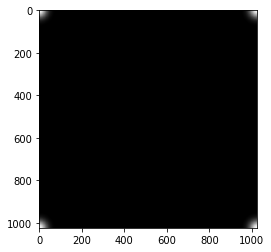

In [12]:
plt.imshow(psf,cmap='gray',vmin = 0.01)

In [164]:
# get ft with 

from numpy.fft import rfft2 , irfft2

In [173]:
blur_fft = rfft2(blur)
psf_fft = rfft2(psf)

Only go to 512, this has to do with the fact that 

In [174]:
#remove all small boys

iz = np.where(psf_fft < 1e-3)
psf_fft[iz] = 1

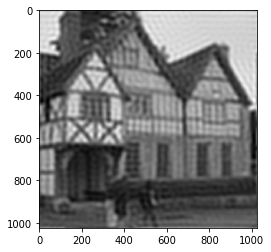

In [180]:
plt.imshow(irfft2(np.divide(blur_fft,psf_fft)/1024**2),'gray')

In [182]:
a_fft = blur_fft/psf_fft

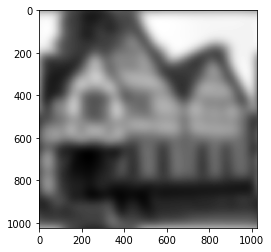

In [183]:
plt.imshow(blur,cmap='gray')